# Linear Normalization
Most normalizations are linear normalizations  
Linear normalization applies this pattern: 

**<font size="3">
`xNorm = (x - offset)/scale` 
</font>**  

Where: 
- x is a numeric variable
- offset shifts variable x lower or higher
- scale, also called spread, re-scales variable x to a smaller or larger scale (spread)
- xNorm is the normalized variable

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Different Linear Normalization Methods
We will consider 3 different normalization methods:
- Trivial Normalization
- Min-max or Feature scaling
- Z-Normalization or Standard Normalization or Standard Scoring

First we need an array that we can normalize.  We call this array a variable.  The variable's name is `x`.  We add this variable to a dataframe so that we can easily compare this variable to its normalized versions.

In [2]:
x = np.array([1,11,5,3,15,3,5,9,7,9,3,5,7,3,5,21.])
X = pd.DataFrame(data = x, columns = ['x'])
X.round(decimals=2)

,x
0,1.0
1,11.0
2,5.0
3,3.0
4,15.0
5,3.0
6,5.0
7,9.0
8,7.0
9,9.0


### Trivial Normalization
- The transformation offset is 0
- The transformation scale is 1
- nothing changes
  
In math a trivial process is one that doesn't change anything

In [3]:
offset = 0
scale = 1 
X['Trivial'] = (x - offset)/scale
print(" Trivial normalization doesn't change values:")
X.round(decimals=2)

 Trivial normalization doesn't change values:


,x,Trivial
0,1.0,1.0
1,11.0,11.0
2,5.0,5.0
3,3.0,3.0
4,15.0,15.0
5,3.0,3.0
6,5.0,5.0
7,9.0,9.0
8,7.0,7.0
9,9.0,9.0


### Min-max or Feature scaling
- offset is min of x
- scale is the range of x or the max of x minus the min of x
- The min of a min-max-normalized variable is zero
- The max of a min-max-normalized variable is one

In [4]:
offset = min(x)
scale = max(x) - min(x)
X['MinMax'] = (x - offset)/scale
print(" The min-max-normalized variable has values from 0 to 1")
X.round(decimals=2)

 The min-max-normalized variable has values from 0 to 1


,x,Trivial,MinMax
0,1.0,1.0,0.0
1,11.0,11.0,0.5
2,5.0,5.0,0.2
3,3.0,3.0,0.1
4,15.0,15.0,0.7
5,3.0,3.0,0.1
6,5.0,5.0,0.2
7,9.0,9.0,0.4
8,7.0,7.0,0.3
9,9.0,9.0,0.4


### Z-Normalization or Standard Normalization or Standard Scoring
- offset is mean of x (The mean of a z-normalized variable is zero)
- scale is standard deviation of x (The standard deviation of a z-normalized variable is one)
- Most of the values are between -2 and +2

In [5]:
offset = np.mean(x)
scale = np.std(x)
X['Z'] = (x - offset)/scale
print(" The Z-normalized variable has most values within -2 and + 2")
X.round(decimals=2)

 The Z-normalized variable has most values within -2 and + 2


,x,Trivial,MinMax,Z
0,1.0,1.0,0.0,-1.2
1,11.0,11.0,0.5,0.8
2,5.0,5.0,0.2,-0.4
3,3.0,3.0,0.1,-0.8
4,15.0,15.0,0.7,1.6
5,3.0,3.0,0.1,-0.8
6,5.0,5.0,0.2,-0.4
7,9.0,9.0,0.4,0.4
8,7.0,7.0,0.3,0.0
9,9.0,9.0,0.4,0.4


### Robust Normalization
(similar to Median Median Absolute Deviation)
- offset is median of x (The median of a Robust-normalized variable is zero)
- scale is difference between the 75th and 25th percentile
- very resistant to outliers

In [6]:
offset = np.median(x)
scale = np.quantile(x, 0.75) - np.quantile(x, 0.25) # np.median(np.absolute(x - np.median(x)))
print(scale, np.median(np.absolute(x - np.median(x))))
X['Robust'] = (x - offset)/scale
print(" The Robust-normalized variable is zeroed around the median and has at least 50% of its values within -1 and +1")
X.round(decimals=2)

6.0 2.0
 The Robust-normalized variable is zeroed around the median and has at least 50% of its values within -1 and +1


,x,Trivial,MinMax,Z,Robust
0,1.0,1.0,0.0,-1.2,-0.67
1,11.0,11.0,0.5,0.8,1.00
2,5.0,5.0,0.2,-0.4,0.00
3,3.0,3.0,0.1,-0.8,-0.33
4,15.0,15.0,0.7,1.6,1.67
5,3.0,3.0,0.1,-0.8,-0.33
6,5.0,5.0,0.2,-0.4,0.00
7,9.0,9.0,0.4,0.4,0.67
8,7.0,7.0,0.3,0.0,0.33
9,9.0,9.0,0.4,0.4,0.67


### Comparisons of linear Normalizations
The above normalizations all have different numbers
How do their histograms compare?

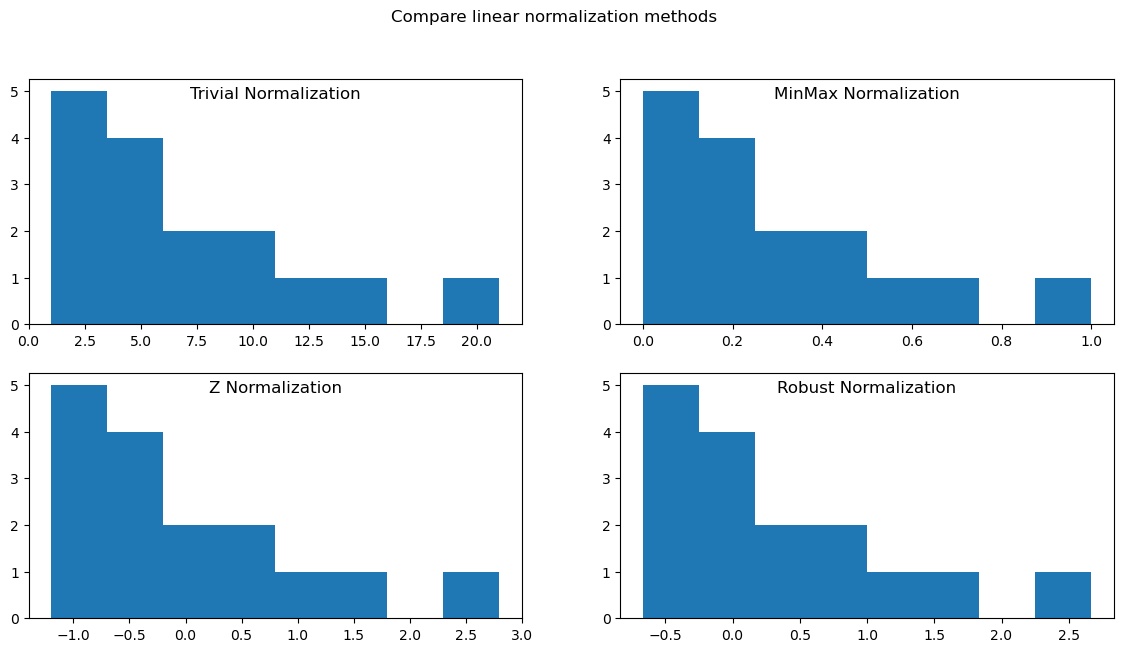

In [7]:
fig, axes = plt.subplots(2, 2, figsize = (14,7))
axes[0, 0].hist(x = X.Trivial, bins=8)
axes[0, 0].set_title('Trivial Normalization', y=1.0, pad=-14)
axes[0, 1].hist(x = X.MinMax,  bins=8)
axes[0, 1].set_title('MinMax Normalization', y=1.0, pad=-14)
axes[1, 0].hist(x = X.Z,       bins=8)
axes[1, 0].set_title('Z Normalization', y=1.0, pad=-14)
axes[1, 1].hist(x = X.Robust,     bins=8)
axes[1, 1].set_title('Robust Normalization', y=1.0, pad=-14);
fig.suptitle('Compare linear normalization methods');

### What is the difference between these normalizations?
The histograms (distributions) all look alike except for their x-axis values. A linear normalization will not change the shape of the histogram (distribution).  The normalization will only shift and rescale the x-axis of the histogram (distribution).  Therefore, when we look at effects of normalizations on a single variable, we should focus on scalars that describe the distribution, like:
- Minimum
- Maximum
- Mean
- Median
- Standard Deviation

Usually, just 2 of the above scalars are sufficient to describe the linear normalization of a variable.  See the table below.

In [8]:
CompareNorms = []
CompareNorms.append(['Original', np.min(x), np.max(x), np.mean(x), np.std(x), np.median(x)])
CompareNorms.append(['Trivial', np.min(X.Trivial), np.max(X.Trivial), np.mean(X.Trivial), np.std(X.Trivial), np.median(X.Trivial)])
CompareNorms.append(['MinMax', np.min(X.MinMax), np.max(X.MinMax), np.mean(X.MinMax), np.std(X.MinMax), np.median(X.MinMax)])
CompareNorms.append(['Z', np.min(X.Z), np.max(X.Z), np.mean(X.Z), np.std(X.Z), np.median(X.Z)])
CompareNorms.append(['Robust', np.min(X.Robust), np.max(X.Robust), np.mean(X.Robust), np.std(X.Robust), np.median(X.Robust)])
Distributions = pd.DataFrame(data=CompareNorms, columns=['Normalization', 'Min', 'Max', 'Mean', 'Std', 'Median']).round(decimals=2)
print(" Distributions before Normalizations:")
display(Distributions.head(1))
print(" Distributions after Normalizations")
display(Distributions.loc[1:6,:])

 Distributions before Normalizations:


,Normalization,Min,Max,Mean,Std,Median
0,Original,1.0,21.0,7.0,5.0,5.0


 Distributions after Normalizations


,Normalization,Min,Max,Mean,Std,Median
1,Trivial,1.00,21.00,7.00,5.00,5.0
2,MinMax,0.00,1.00,0.30,0.25,0.2
3,Z,-1.20,2.80,-0.00,1.00,-0.4
4,Robust,-0.67,2.67,0.33,0.83,0.0
